# Insurance Premium Prediction

## Objective
Predict medical insurance charges using demographic and health features.

## Dataset
Kaggle Insurance Dataset (1337 samples)

## Models Used
- Linear Regression
- Random Forest
- XGBoost

## Final Best R² Score: 0.885

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 1. Data Loading

In [133]:
df = pd.read_csv("insurance.csv")

In [134]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 2. Exploratory Data Analysis

In [135]:
 df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [136]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [137]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [138]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [139]:
numeric_col = ['age', 'bmi', 'children',  'charges']

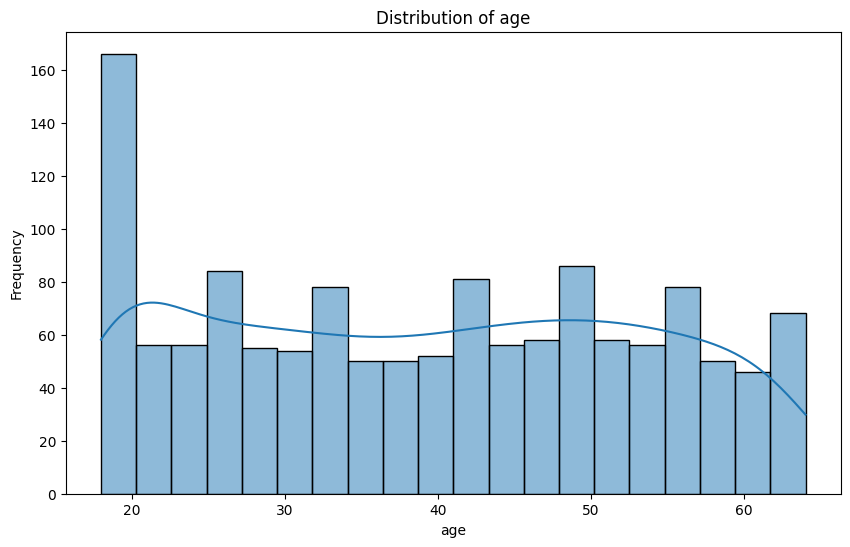

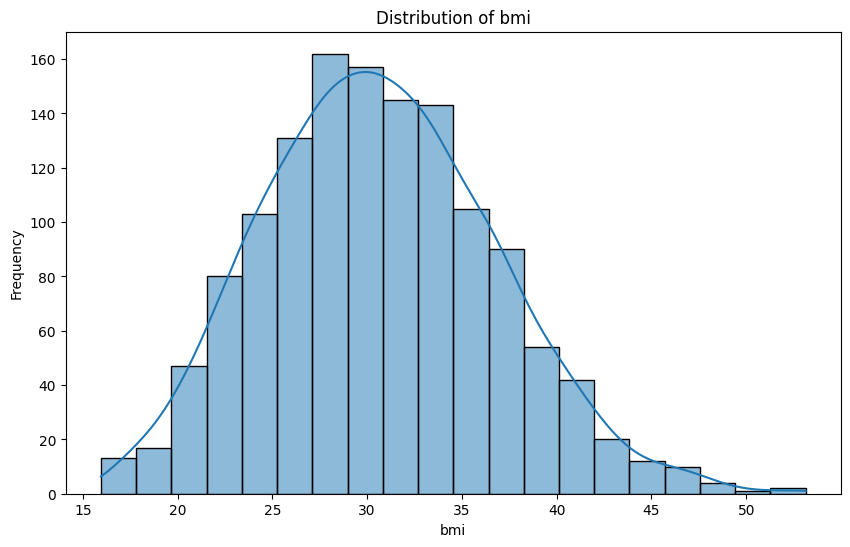

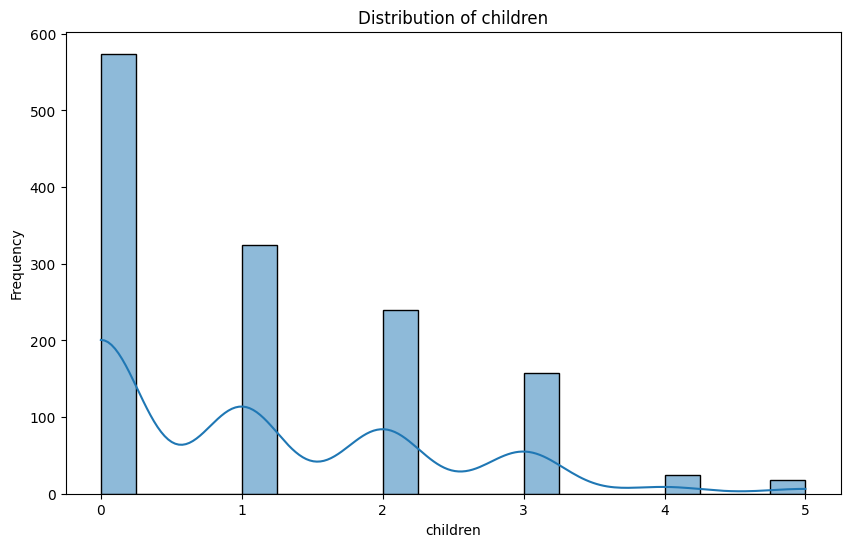

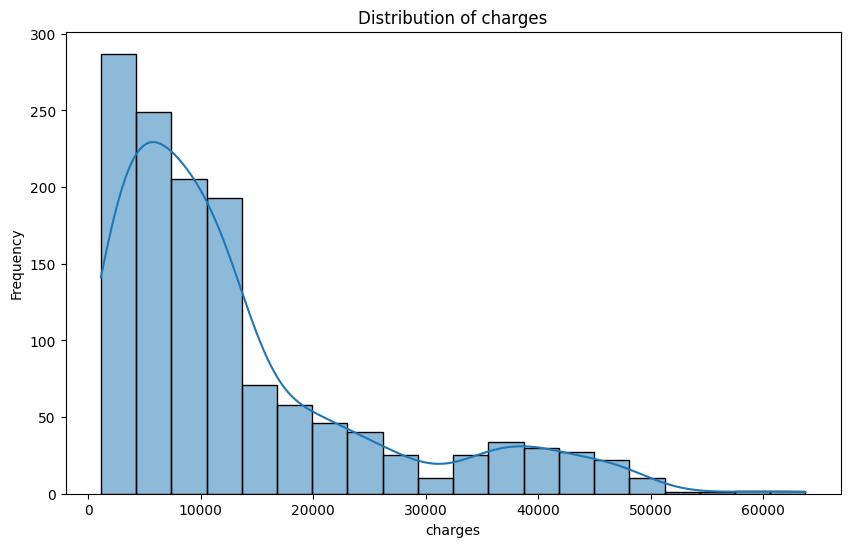

In [140]:
for col in numeric_col:
    plt.figure(figsize =(10,6))
    sns.histplot(df[col],kde=True,bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

<Axes: xlabel='children', ylabel='count'>

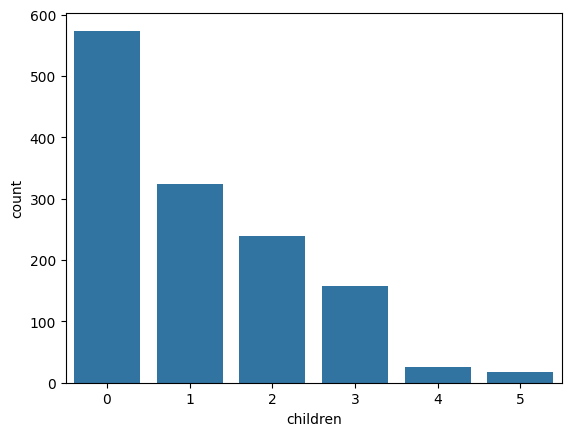

In [141]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

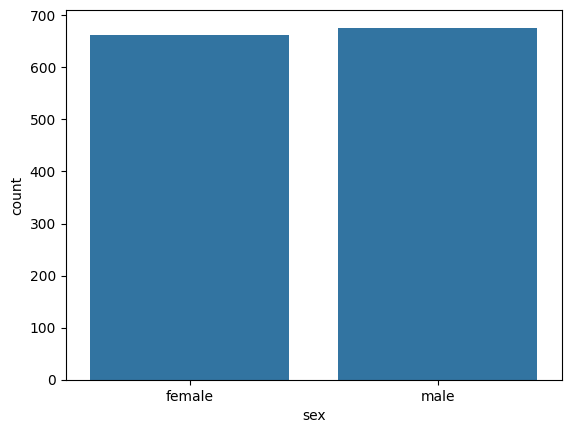

In [142]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

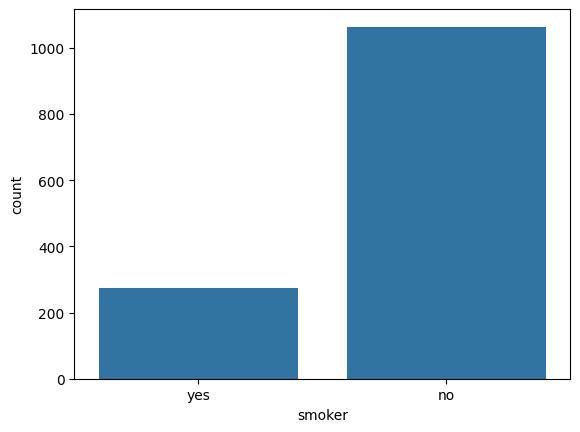

In [143]:
sns.countplot(x=df['smoker'])

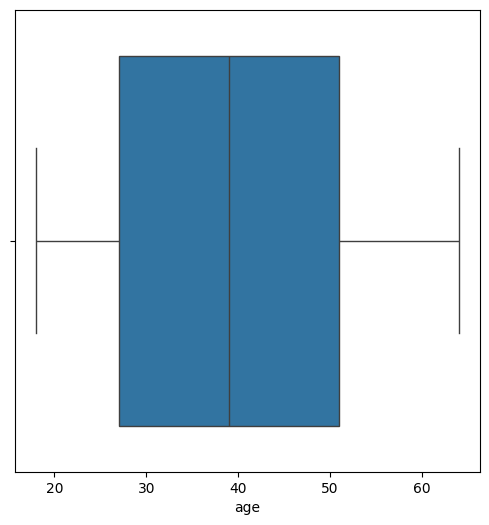

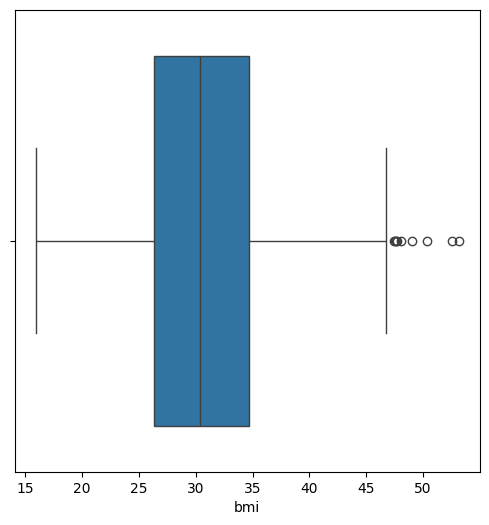

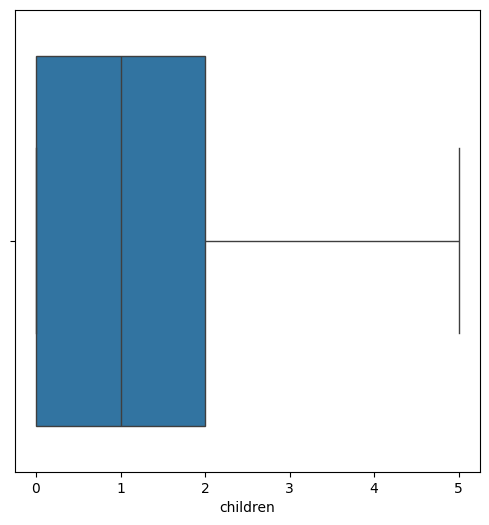

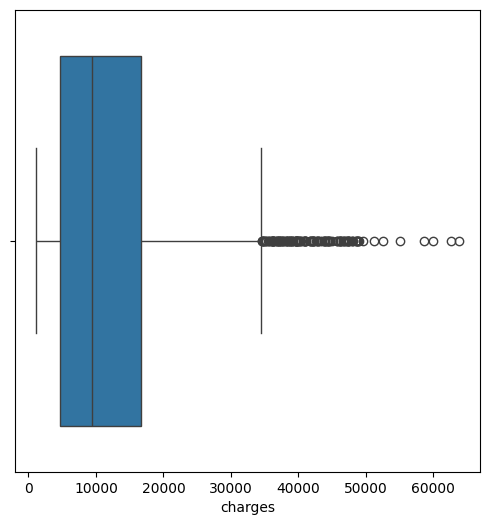

In [144]:
 for col in numeric_col:
     plt.figure(figsize =(6,6))
     sns.boxplot(x=df[col])
     plt.show()

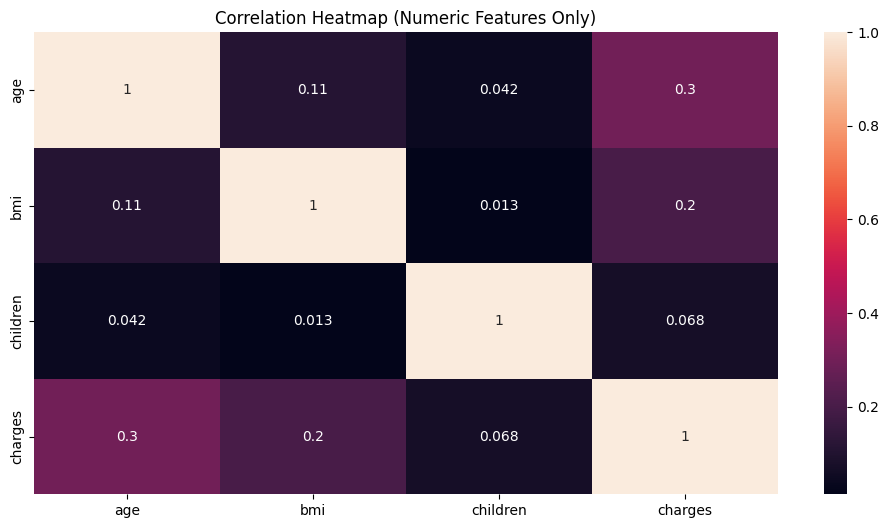

In [145]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot= True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

## 3. Data Cleaning

In [146]:
 df_cleaned=df.copy()

In [147]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
df_cleaned.drop_duplicates(inplace=True)

In [149]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [150]:
df_cleaned.shape

(1337, 7)

In [151]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [152]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [153]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [154]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [155]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## 4. Encoding

In [156]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})

In [157]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [158]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

### One Hot Encoding

In [159]:
 df_cleaned = pd.get_dummies(df_cleaned,columns=['region'])

In [160]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


## 5. Feature Engineering

<Axes: xlabel='bmi', ylabel='Count'>

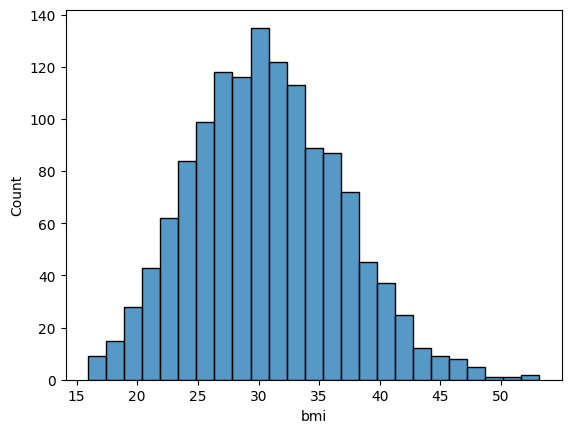

In [161]:
sns.histplot(df_cleaned['bmi'])

In [162]:
 df_cleaned['bmi_catagory'] = pd.cut(
     df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,float('inf')],
     labels=['underweight','normal','overweight','obese']
 )

In [163]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_catagory
0,19,1,27.900,0,1,16884.92400,False,False,False,True,overweight
1,18,0,33.770,1,0,1725.55230,False,False,True,False,obese
2,28,0,33.000,3,0,4449.46200,False,False,True,False,obese
3,33,0,22.705,0,0,21984.47061,False,True,False,False,normal
4,32,0,28.880,0,0,3866.85520,False,True,False,False,overweight


In [164]:
df_cleaned = pd.get_dummies(df_cleaned, 
                            columns=['bmi_catagory'], 
                            drop_first=True)


In [165]:
df_cleaned


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_catagory_normal,bmi_catagory_overweight,bmi_catagory_obese
0,19,1,27.900,0,1,16884.92400,False,False,False,True,False,True,False
1,18,0,33.770,1,0,1725.55230,False,False,True,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,False,True,False,False,False,True
3,33,0,22.705,0,0,21984.47061,False,True,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,False,True,False,False,False,False,True
1334,18,1,31.920,0,0,2205.98080,True,False,False,False,False,False,True
1335,18,1,36.850,0,0,1629.83350,False,False,True,False,False,False,True
1336,21,1,25.800,0,0,2007.94500,False,False,False,True,False,True,False


In [166]:
bool_cols = df_cleaned.select_dtypes(include='bool').columns
df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(int)

In [167]:
df_cleaned 

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_catagory_normal,bmi_catagory_overweight,bmi_catagory_obese
0,19,1,27.900,0,1,16884.92400,0,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,0,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0,0,0,1
1334,18,1,31.920,0,0,2205.98080,1,0,0,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,0,1,0,0,0,1
1336,21,1,25.800,0,0,2007.94500,0,0,0,1,0,1,0


In [168]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_catagory_normal,bmi_catagory_overweight,bmi_catagory_obese
0,19,1,27.900,0,1,16884.92400,0,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,0,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0,0,0,1
1334,18,1,31.920,0,0,2205.98080,1,0,0,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,0,1,0,0,0,1
1336,21,1,25.800,0,0,2007.94500,0,0,0,1,0,1,0


In [169]:
df_cleaned["age_group"] = pd.cut(
    df_cleaned["age"],
    bins=[17, 25, 40, 60, 100],
    labels=["young", "adult", "middle_aged", "senior"]
)

df_cleaned = pd.get_dummies(df_cleaned, columns=["age_group"], drop_first=True)


In [170]:
df_cleaned["age_bmi"] = df_cleaned["age"] * df_cleaned["bmi"]


In [171]:
df_cleaned["family_risk"] = df_cleaned["children"] * df_cleaned["age"]


## 6. Model Training

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42)


In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [176]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
X_train_scaled

array([[ 0.159588  ,  1.94262954,  0.87163523],
       [ 0.4384324 ,  1.94262954, -1.30369918],
       [-0.53752299, -0.51476619, -0.33914016],
       ...,
       [-1.30434509, -0.51476619, -1.45515186],
       [-0.0495453 , -0.51476619, -0.43982659],
       [-0.25867859, -0.51476619,  0.89024952]], shape=(401, 3))

## 7. Linear Regression Model

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

scores = cross_val_score(
    model,
    X,
    y,
    cv=3,
    scoring="r2"
)

print("R2 Scores:", scores)
print("Mean R2:", np.mean(scores))

R2 Scores: [0.75291489 0.75894244 0.72591736]
Mean R2: 0.7459248964365229


In [179]:
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [180]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [181]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.751369536125702
MAE: 4228.860064033956
MSE: 37475340.76552821
RMSE: 6121.710607789967


## 8. Random Forest Model

In [182]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, rf_pred))

R2: 0.8302021902371636


In [185]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("R2:", r2_score(y_test, xgb_pred))

R2: 0.7989917466316536


## 9. Final Model (Best Performing)

In [186]:
X = df_cleaned.drop("charges", axis=1)
y = df_cleaned["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, rf_pred))

R2: 0.8853517434172372


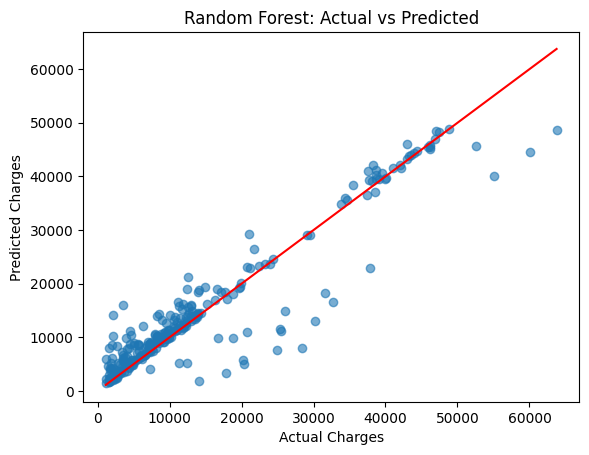

In [190]:
plt.scatter(y_test, rf_pred, alpha=0.6)

line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

In [191]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [0.751, 0.885, 0.799]
})

results

,Model,R2 Score
0,Linear Regression,0.751
1,Random Forest,0.885
2,XGBoost,0.799


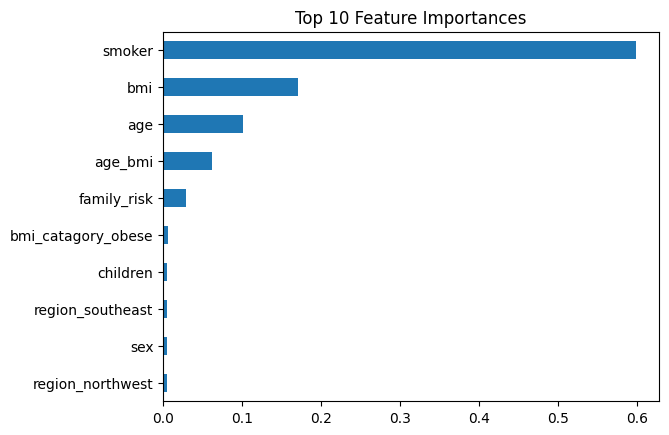

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().tail(10).plot(kind="barh")

plt.title("Top 10 Feature Importances")
plt.show()

## Conclusion

- Smoking status is the strongest predictor of insurance charges.
- Age and BMI interactions significantly impact premium costs.
- Random Forest achieved the highest performance (R² = 0.885).
- Feature engineering significantly improved model accuracy.